**Table of contents**<a id='toc0_'></a>    
- [TUTORIAL FOR PYGEMMES](#toc1_)    
  - [Python for R user](#toc1_1_)    
    - [Navigating with the objects](#toc1_1_1_)    
      - [Dictionnary](#toc1_1_1_1_)    
      - [Libraries, numpy](#toc1_1_1_2_)    
- [Pygemmes, modules, models, concepts and aggregates](#toc2_)    
  - [Paul Valcke](#toc2_1_)    
    - [EJP internal workshop](#toc2_1_1_)    
  - [Before everything : Import](#toc2_2_)    
  - [What is Pygemmes ?](#toc2_3_)    
  - [pgm toolkit (before hub)](#toc2_4_)    
  - [Map of the library](#toc2_5_)    
  - [The "get" methods](#toc2_6_)    
    - [Get available models](#toc2_6_1_)    
  - [The other "get"](#toc2_7_)    
  - [DOING THE REAL STUFF](#toc2_8_)    
    - [What is the hub initialization doing ?](#toc2_8_1_)    
    - [Doing a run without changing values](#toc2_8_2_)    
    - [The basic plot : temporal, grouped by units](#toc2_8_3_)    
    - [GET ACCESS TO DATA](#toc2_8_4_)    
      - [Technical point : the data shape](#toc2_8_4_1_)    
    - [Access to plots already existing](#toc2_8_5_)    
    - [Presets !](#toc2_8_6_)    
    - [THE INFAMOUS SET_DPARAM](#toc2_8_7_)    
  - [Convergence rate and valleys of stability](#toc2_9_)    
  - [Multisectorality](#toc2_10_)    
  - [Inter-region interactions](#toc2_11_)    
    - [RUN PERTURBATION](#toc2_11_1_)    
- [Your turn !](#toc3_)    
  - [Running the system on your own](#toc3_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[TUTORIAL FOR PYGEMMES](#toc0_)

This document is a *notebook*, a document mixing : 
* Markdown (press M on a cell to transform it, add equations, images...)
* Code cells (press Y)
* Terminal output under code cells 

## <a id='toc1_1_'></a>[Python for R user](#toc0_)

* In python, the first index is 0 
* In python, everything is an object with methods
* To access available extensions of an object, use tab 
* To access docstring of an object, use `object?` 
* Comments with `# blablabla` 
* Strings with 
### <a id='toc1_1_1_'></a>[Navigating with the objects](#toc0_)
#### <a id='toc1_1_1_1_'></a>[Dictionnary](#toc0_)

In [ ]:
dict1= {'key1' : 'value1',
        'key2' : 'value2',
        #[...]
        }
dict1['key3'] = 'value3'

k     = dict1.keys()
v     = dict1.values()

# **dict1 to unpack 
print(k,v)

In [ ]:
# If you have a dictionnary of dictionnary of dictionnary : 
dict0 = { 'firstdict' : { 'second':'Hello !' },
          'else' : ['hello','test',0],      
                }
print(dict0['firstdict']['second'])
print(dict0['else'][1])

#### <a id='toc1_1_1_2_'></a>[Libraries, numpy](#toc0_)

In [ ]:
import numpy # importing a library
import numpy as np # importing and renaming 

np.random.uniform # is an object
np.random.uniform() # is the execution of the object

x = np.zeros((5,3,2,2)) # creating a 4-dimensional array 
print(x[1,0,0,-1])      # -1 is the last element (-2 before etc)
print(30*'###')
print(x[0,...,-1])      # ... for all elements in the middle dimensions
print(30*'###')
print(x[:,0,0,0])       # : is the whole dimension
print(30*'###')
print(x[2:,...])        # 2: if from the second element up to the end 
print(30*'###')
print(x[:-2,...])       # :-2 all elements up to the last

x[0,:]=1 
print(x)


# <a id='toc2_'></a>[Pygemmes, modules, models, concepts and aggregates](#toc0_)

## <a id='toc2_1_'></a>[Paul Valcke](#toc0_)

### <a id='toc2_1_1_'></a>[EJP internal workshop](#toc0_)

The goal of this session is : 
1. pygemmes can run on your computer
2. You know what are the properties of `pgm` and `hub`, how they work
3. You know how to :
    * get the knowledge of what is available
    * load the model you want, with a preset if you want
    * modify parameters and conditions
    * run simulations
    * do deeper analysis
    * plot data
4. You can write your own model

## <a id='toc2_2_'></a>[Before everything : Import](#toc0_)

* **pygemmes** can be downloaded on https://github.com/DaluS/GEMMES (branch : devel). The repo is private you need to give me your github pseudo to get it. 
* your python must know where to load the library, either define your "GEMMES" folder as original path, or execute the line under it.

you will need the following library : numpy, scipy, matplotlib, pyvis 


In [1]:
import sys 

# Install all dependencies
!{sys.executable} -m pip install numpy pandas ipywidgets matplotlib plotly scipy pyvis jupyter inspect functools mpl_toolkits itables ipympl pylatexenc

# Change path as the folder adress you have put the library in 
path = "C:\\Users\\Paul Valcke\\Documents\\GitHub\\GEMMES" 
sys.path.insert(0, path)
import pygemmes as pgm

############# MISC IMPORTS ###############
from itables import init_notebook_mode
import itables.options as opt
init_notebook_mode(all_interactive=True)

%matplotlib widget
from IPython.display import display,HTML,Markdown
from IPython.display import IFrame

opt.columnDefs = [{"className": "dt-left", "targets": "_all"}]
opt.classes="display nowrap compact"
opt.scrollY="500px"
opt.scrollCollapse=True
opt.paging=False

  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)


ERROR: Ignored the following versions that require a different python version: 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.0rc1 Requires-Python >=3.7,<3.10; 1.7.0rc2 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10; 1.7.2 Requires-Python >=3.7,<3.11; 1.7.3 Requires-Python >=3.7,<3.11; 1.8.0 Requires-Python >=3.8,<3.11; 1.8.0rc1 Requires-Python >=3.8,<3.11; 1.8.0rc2 Requires-Python >=3.8,<3.11; 1.8.0rc3 Requires-Python >=3.8,<3.11; 1.8.0rc4 Requires-Python >=3.8,<3.11; 1.8.1 Requires-Python >=3.8,<3.11
ERROR: Could not find a version that satisfies the requirement inspect (from versions: none)
ERROR: No matching distribution found for inspect



pyIDEE

* Version 0.9
* Last update 2023/01/03
* Developped at the environmental justice program https://environmentaljustice.georgetown.edu/#
* Contact : Paul Valcke pv229@georgetown.edu

Welcome in PyIDEE, a modular library to prototype and study dynamical systems !
This library is oriented toward generation of macroeconomic complexity models

If you find bugs, want some new extensions, or help us improve the library, please create a new issue on github
If this is the first time you open this library, please look at the tutorial file in doc/tutorial.py or better, and execute it line by line.

The ipythonNotebook is at : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\doc\TUTORIALS\TUTORIAL.ipynb
If you want to customize pyIDEE (advancer users) like removing this message, edit : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_config.py


<IPython.core.display.Javascript object>

## <a id='toc2_3_'></a>[What is Pygemmes ?](#toc0_)

A differential system solver with "extra steps" :
* library of models
* Easy model creation, modification, coupling, tweaking 
* Automatic space allocation, resolution order
* Model summary, representation...
* Plots, analysis of cycles, sensibility


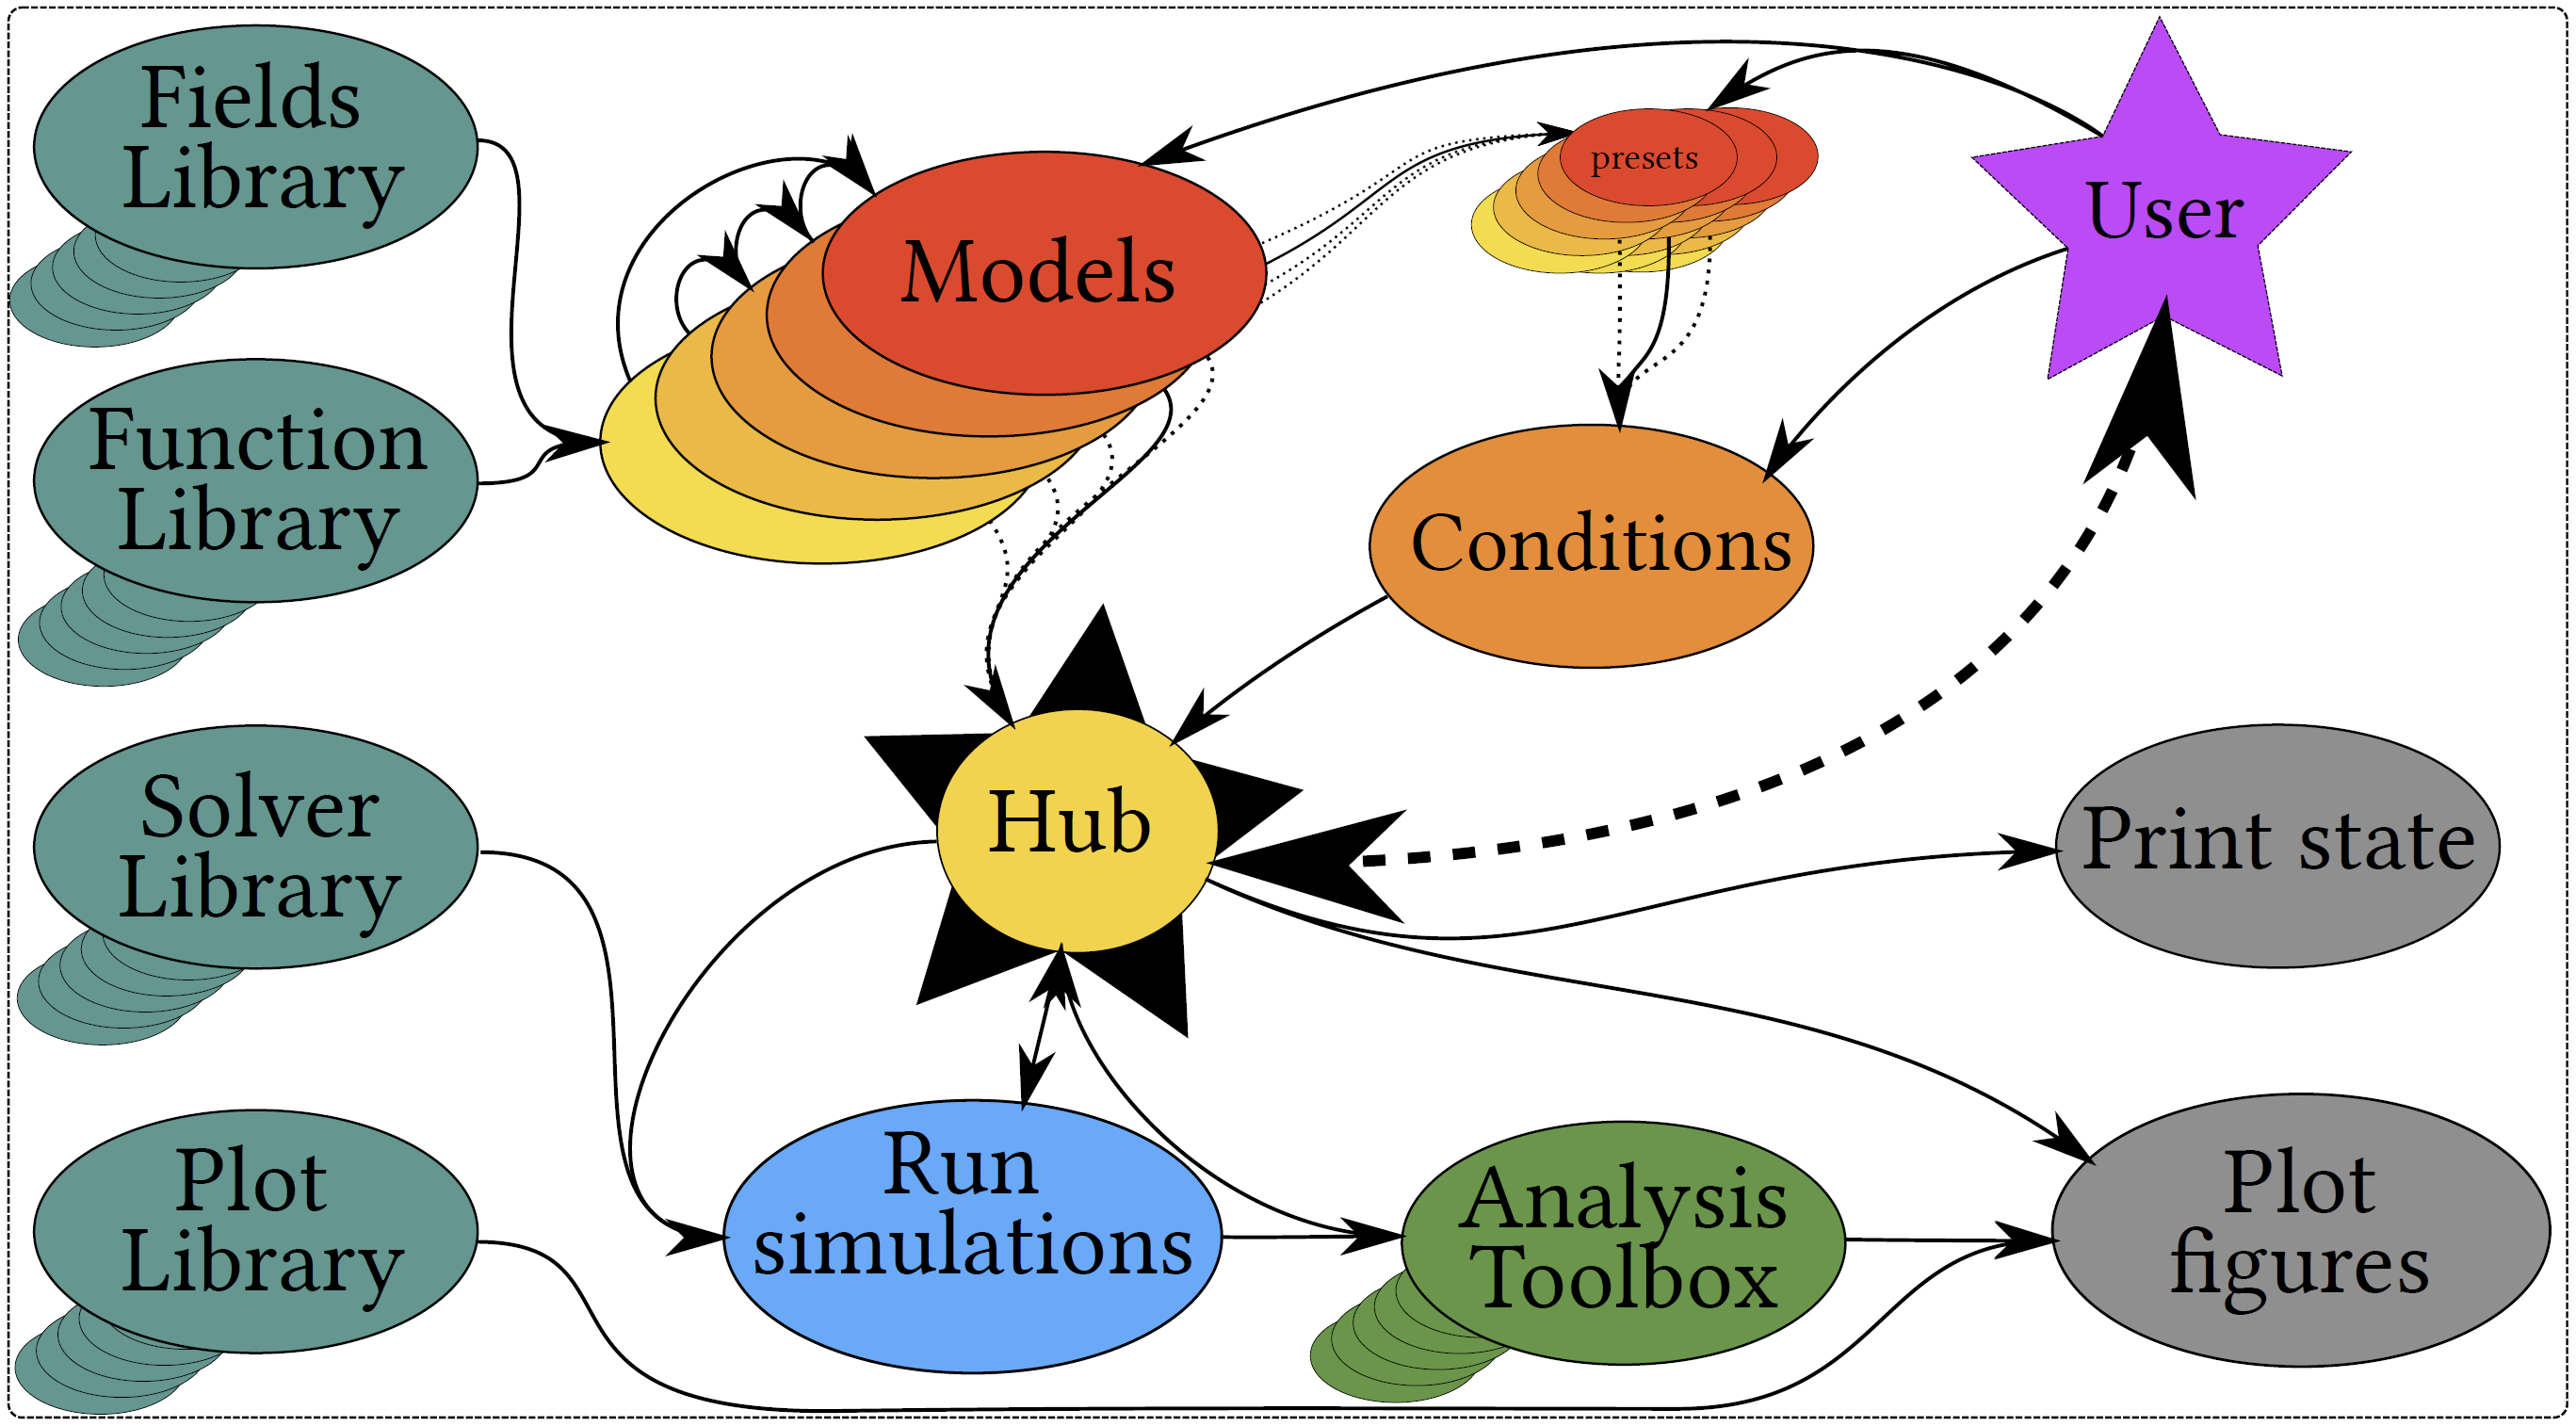

## <a id='toc2_4_'></a>[pgm toolkit (before hub)](#toc0_)

**ALWAYS USE TAB, AUTOINDENTATION, HELP( ), ? When exploring a library**

In [ ]:
help(pgm)

## <a id='toc2_5_'></a>[Map of the library](#toc0_)


## <a id='toc2_6_'></a>[The "get" methods](#toc0_)
A lot of things are already coded in pygemmes so that you do not have to code them. There are multiple categories : 
* **Model files**, containing the endogenisation loops of your system (the equations), an ensemble of preset of values and associated plots
* **solvers**, to do temporal run of your set of equations 
* **fields**, an ensemble of definitions and basic value that can be shared through models (units, symbol, definitions, default values...) 
* **functions**, an ensemble of equations linking fields that can be called easily (a Philips curve, a population growth...)
* **plot**, an ensemble of custom-made plots that can be called easily for this architecture
* **output**, an ensemble of presaved runs (disactivated in 0.9)

### <a id='toc2_6_1_'></a>[Get available models](#toc0_)
Those model are already coded, and have preset and plots associated to them ! 
You can use them directly to see what other modellers have done, 

In [ ]:
pgm. # FILL THE CELL !

In [ ]:
pgm.get_available_models()
lmodel = pgm.get_available_models(Return=dict).keys()

In [ ]:
Markdown(pgm.get_available_model_documentation('CHIMES0'))

In [ ]:
pgm.get_available_fields()

## <a id='toc2_8_'></a>[DOING THE REAL STUFF](#toc0_)

Now we will load a model, and see what we can do with it

The **MOST IMPORTANT** element of pygemmes is the **Hub**. You will call it with a model inside of it, then interact with the model through the Hub.

In [ ]:
help(pgm.Hub)

A model is : 
* an ensemble of fields, quantities describing physical or informational values (temperature, employment)
* an equation associated to each of the field, determining its value over time, and how each fields are related to each others

there are three categories of possible equations : 
* **parameter :** the value is a constant (example, the gravitational constant, or the size of Mount Everest in a short-run simulation)
* **state variable :** the value is fully determined by every other fields ( the employment is determined by the quantity of workers and the population able to work, two other fields)
* **differential variables :** the variation of the value is a state variable : think about stock and flows : the variation of the stock is computed through the sum of the flow

It is possible that a same field is a parameter in some model (exogenous, constant), a state variable in other (instant adaptation), or a differential in others 

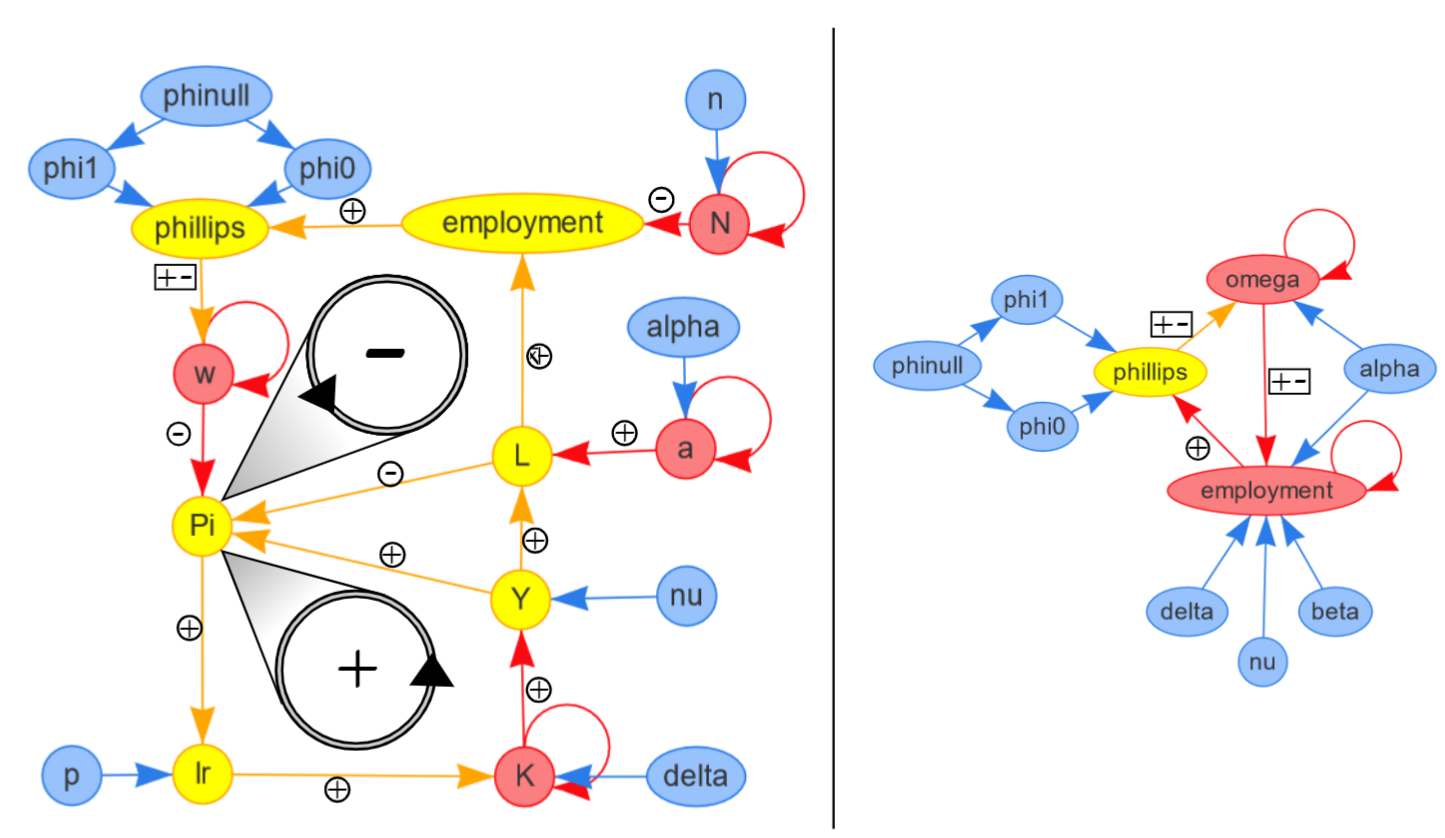

Here parameters are in blue, state variable yellow, differential variable in red. 
An simple criteria to know if it is an interesting model is "a model with loop in it, both positive and negative". 
On the left, the system is a Goodwin will its "extensive" equations, and on the right the dynamics on the phase-space. Both will solve the same overall thing

### <a id='toc2_8_1_'></a>[What is the hub initialization doing ?](#toc0_)

* Find what are all the fields that exist in the system
* Determine if they are differential, state variable, parameters
* Try to find as many existing information as possible (typically in a file called `_def_fields`) that has not been put by the model creator but exist in a common database. It can be :
    * units 
    * symbol
    * definition 
    * default value
    * ...
* Find an order to calculate the system at each timestep, and what variables are necessary (in loops)
* Preparing allocation for future time calculation
* A bit of coffee

In [20]:
hub=pgm.Hub('GK')

The following fields are defined in the model but not it the library :
The following fields are identified as parameters :
	- independant : ['alpha', 'n', 'delta', 'r', 'nu', 'eta', 'mu', 'k0', 'k1', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['Dh', 'time']
	 - state variable : ['d', 'g', 'GDP']
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['Y', 'L', 'GDP', 'd', 'omega', 'employment', 'c', 'Pi', 'inflation', 'phillips', 'pi', 'kappa', 'I', 'Ir', 'g', 'C']
	- differential: ['a', 'N', 'K', 'w', 'p', 'D', 'Dh', 'time']


In [14]:
hub.get_summary()  # definition concern the field definition, com the way it is calculated

############################################################
####################      SUMMARY       ####################
############################################################
Model       : GK
Goodwin-Keen model: debt dynamics with residual consumption
File        : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\Core\_model_GK.py
####################       Fields       ####################
statevar        016 ['Y', 'L', 'GDP', 'd', 'omega', 'employment', 'c', 'Pi', 'inflation', 'phillips', 'pi', 'kappa', 'I', 'Ir', 'g', 'C']
differential    008 ['a', 'N', 'K', 'w', 'p', 'D', 'Dh', 'time']
parameters      019 ['alpha', 'n', 'delta', 'r', 'nu', 'eta', 'mu', 'k0', 'k1', 'philinConst', 'philinSlope', 'Delta', 'Nprod']
####################      Presets       ####################
          default2      : Basic
####################       Flags        ####################
run            : True
cycles         : False
derivative     : False
multisectoral  : False
solver         : No

In [18]:
hub.get_fieldsproperties()

definition  \
a                                        Productivity   
N                   Population of people able to work   
K                               Capital in real units   
w                                          Wage value   
p                                      price of goods   
D                              Debt of private sector   
Dh                                  Debt of household   
pi                                    relative profit   
d                                       relative debt   
omega                                      wage share   
employment                            employment rate   
c                                    production price   
g                              Relative growth of GDP   
Y                                   GDP in real units   
Pi                                    Absolute profit   
I                         Investment in nominal value   
C                         flux of goods for household   
Ir                Number of real unit from investment   
L                                             Workers   
GDP                                      nominal GDP    
inflation                              inflation rate   
kappa                       Part of GDP in investment   
phillips                          Wage inflation rate   
Delta                        shareholding coefficient   
Tmax                             Total simulated time   
Tini                     Initial time for simulations   
dt                                    solver timestep   
nx                      Number of system in parrallel   
nr                   Number of regions interconnected   
Nprod                      Name of productive sectors   
__ONE__      value by default for monosectorial field   
time                                      Time vector   
nt                                 Number of timestep   
alpha                   Rate of productivity increase   
n                           Rate of population growth   
delta                       Rate of capital depletion   
r                                    Interest on debt   
nu                            Capital to output ratio   
eta                      timerate of price adjustment   
mu                                   Markup on prices   
k0             GDP share investedat zeroprofit (expo)   
k1                            Investment slope (expo)   
philinConst         wage rate when full unemployement   
philinSlope     wage rate dependance to unemployement   

                                units  \
a            Units.Humans^{-1}.y^{-1}   
N                              Humans   
K                               Units   
w                $.Humans^{-1}.y^{-1}   
p                        $.Units^{-1}   
D                                   $   
Dh                                  $   
pi                                      
d                                   y   
omega                                   
employment                              
c                        $.Units^{-1}   
g                              y^{-1}   
Y                        Units.y^{-1}   
Pi                           $.y^{-1}   
I                            $.y^{-1}   
C                        Units.y^{-1}   
Ir                       Units.y^{-1}   
L                              Humans   
GDP                          $.y^{-1}   
inflation                      y^{-1}   
kappa                                   
phillips                       y^{-1}   
Delta                                   
Tmax                                y   
Tini                                y   
dt                                  y   
nx                                      
nr                                      
Nprod                       undefined   
__ONE__                     undefined   
time                                y   
nt                                      
alpha                          y^{-1}   
n                              y^{-1}   
d

In [ ]:
hub.get_dataframe(t0=0,t1=0).transpose()

In [ ]:
hub.get_equations_description()

In [11]:
hub.get_Network()
hub.get_Network(params=True)                    # state,differential,parameters
#hub.get_Network(auxilliary=False,params=True)   # remove auxilliary statevar and differential
#hub.get_Network(filters=('Pi',))                # remove the variable Pi and its connexions
#hub.get_Network(filters=('Pi',),redirect=True)  # all connexions from Pi are reconnected

C:\Users\Paul Valcke\Documents\GitHub\GEMMES\doc\GK.html


### <a id='toc2_8_2_'></a>[Doing a run without changing values](#toc0_)
Once the initial state is well determined, you can let the system loop on itself

In [23]:
hub=pgm.Hub('GK_divexp')
hub.run() # Will calculate 1000 steps (100 year run) of a Goodwin-Keen system given the initial conditions
#hub.run(N=1000)

The following fields are defined in the model but not it the library :
The following fields are identified as parameters :
	- independant : ['alpha', 'n', 'delta', 'r', 'nu', 'eta', 'mu', 'k0', 'k1', 'k2', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['Dh', 'time']
	 - state variable : ['d', 'g', 'GDP']
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['Y', 'L', 'GDP', 'd', 'omega', 'employment', 'c', 'Pi', 'inflation', 'phillips', 'pi', 'kappa', 'I', 'Ir', 'g', 'C']
	- differential: ['a', 'N', 'K', 'w', 'p', 'D', 'Dh', 'time']

time step 1000 / 1000


### <a id='toc2_8_3_'></a>[The basic plot : temporal, grouped by units](#toc0_)
for the moment we do not talk about region, idx, sectors, which are properties for more advanced systems !

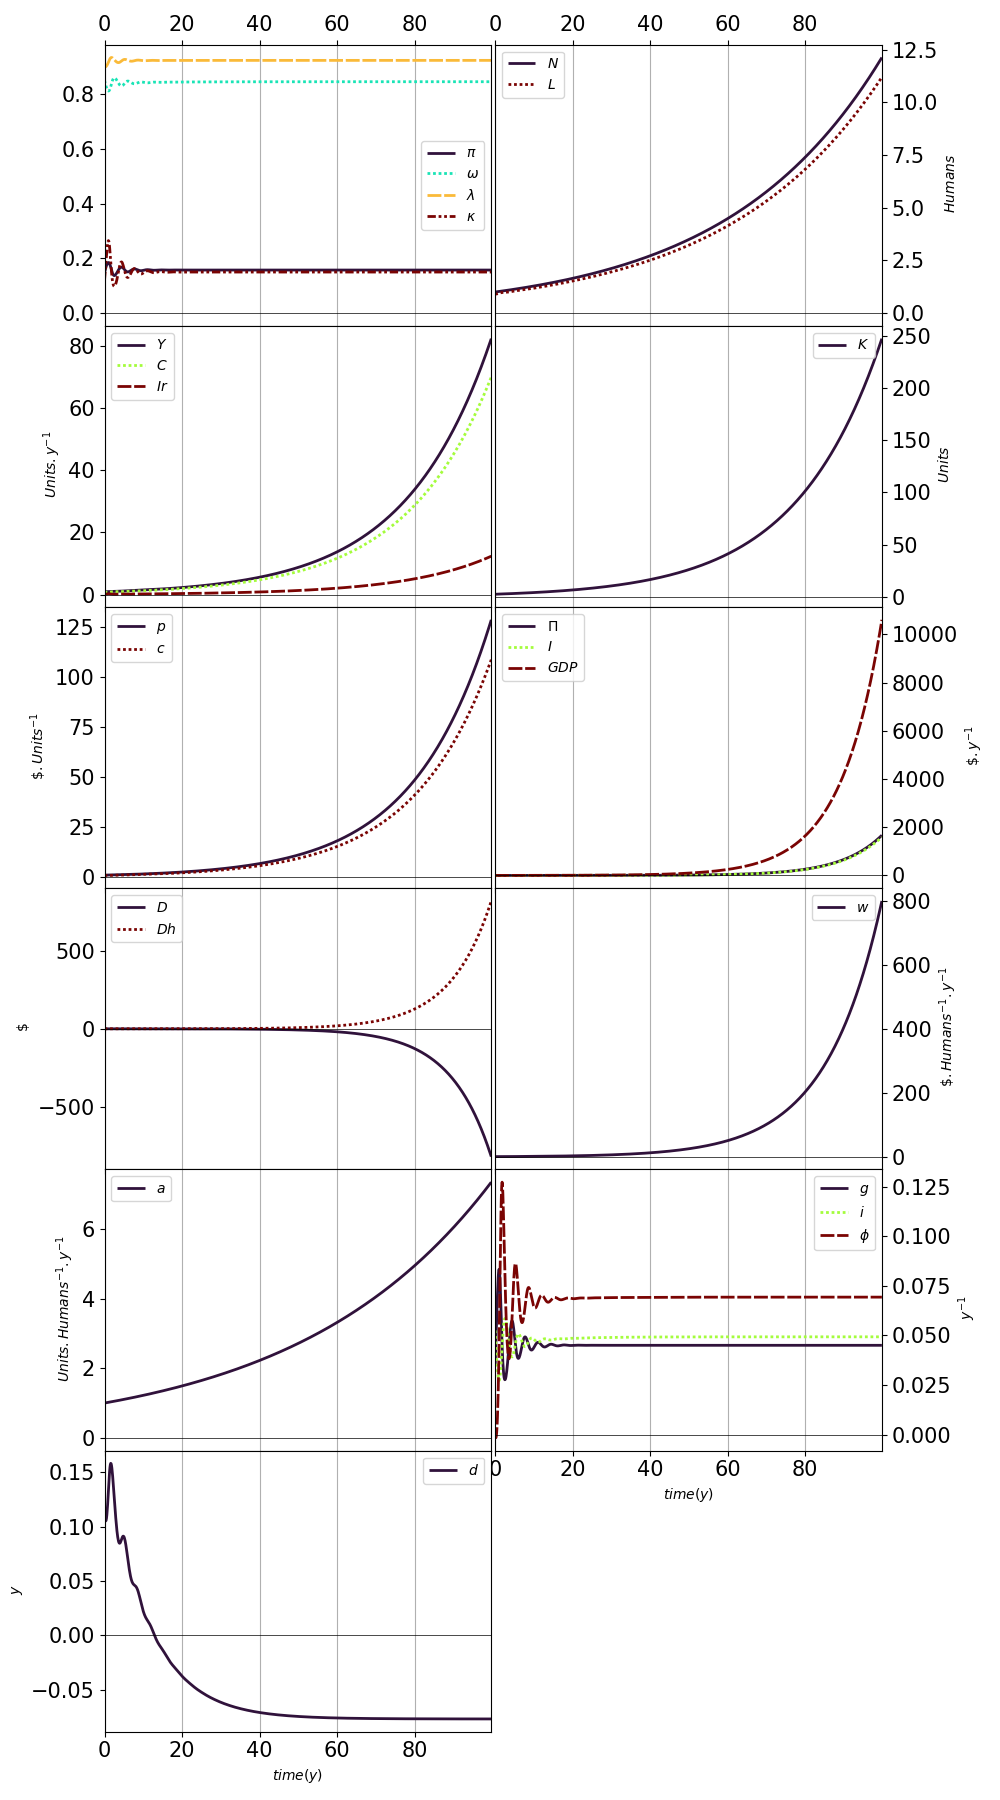

Help on method plot in module pygemmes._core:

plot(filters_key=(), filters_units=(), filters_sector=(), separate_variables={}, idx=0, Region=0, title='', tini=False, tend=False, lw=2) method of pygemmes._core.Hub instance
    generate one subfigure per set of units existing.
    
    There are three layers of filters, each of them has the same logic :
    if the filter is a tuple () it exclude the elements inside,
    if the filter is a list [] it includes the elements inside.
    
    Filters are the following :
    filters_units      : select the units you want
    filters_sector     : select the sector you want  ( '' is all monosetorial variables)
    filters_sector     : you can put sector names if you want them or not. '' corespond to all monosectoral variables
    separate_variables : key is a unit (y , y^{-1}... and value are keys from that units that will be shown on another graph,
    
    Region             : is, if there a multiple regions, the one you want to plot
    idx 

In [24]:
help(hub.plot)
hub.plot()

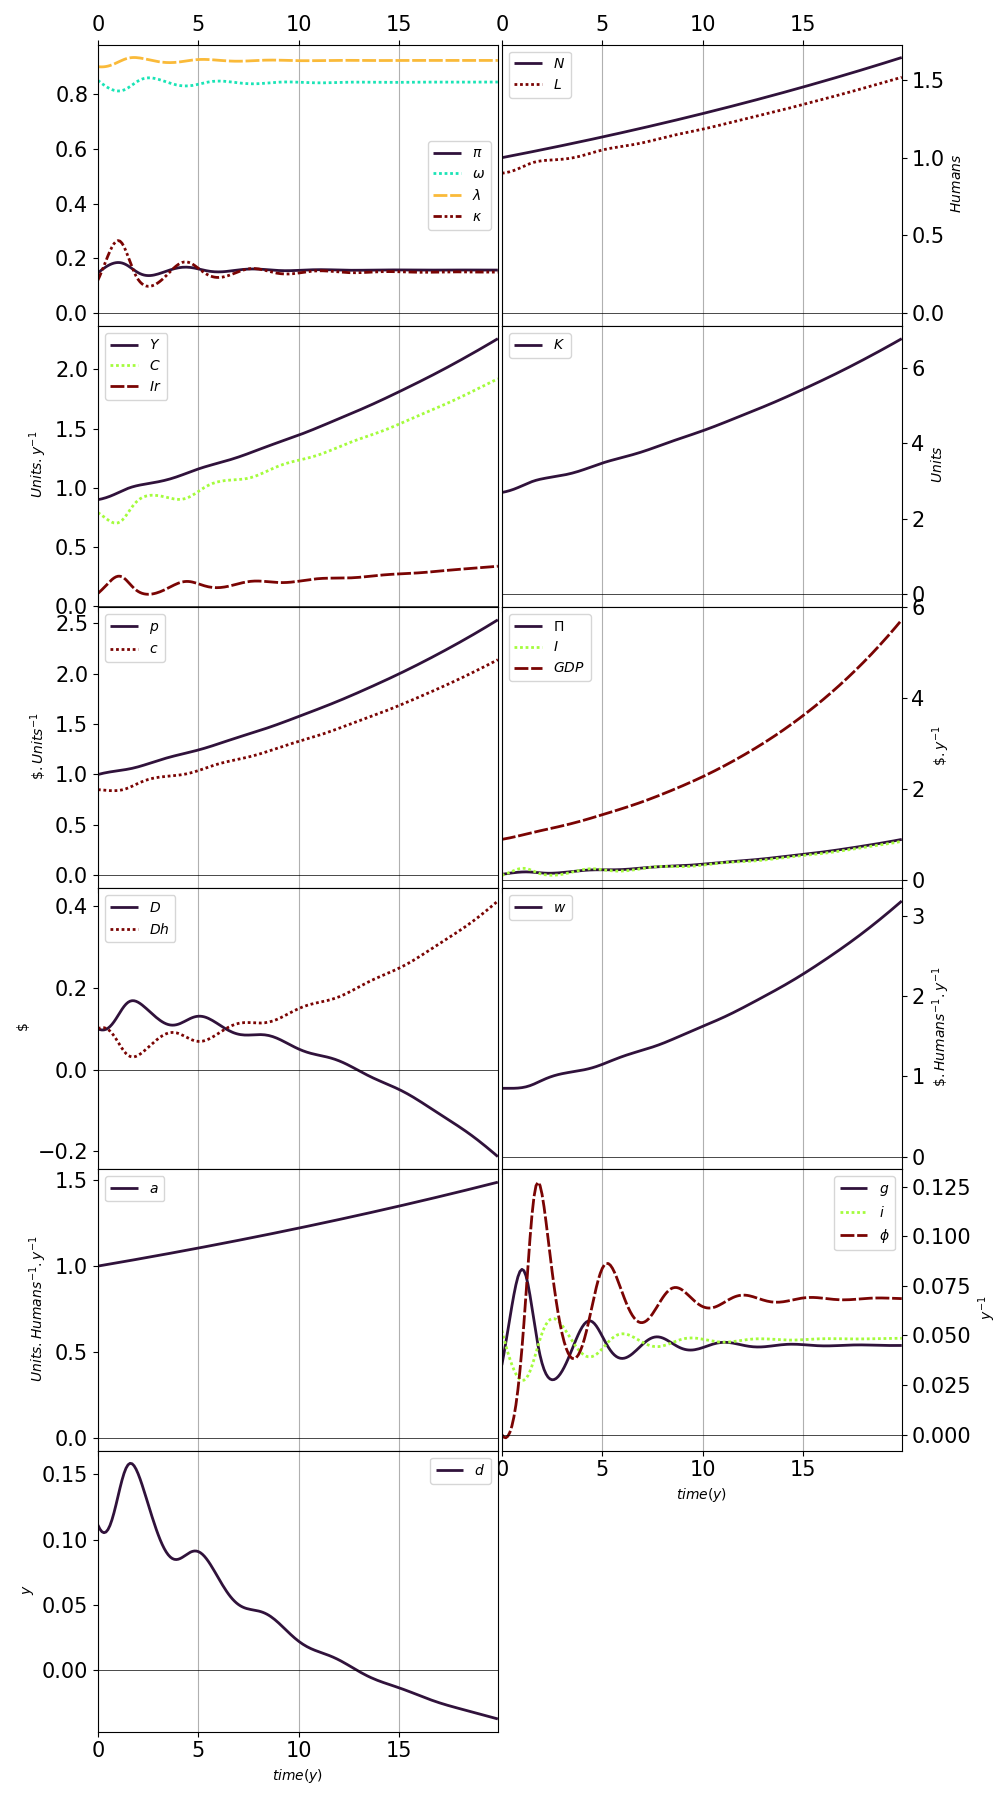

In [26]:
hub.plot(tend=20)


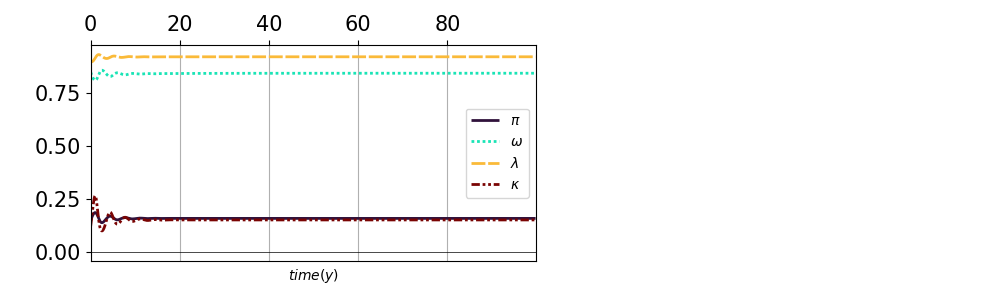

##################################################


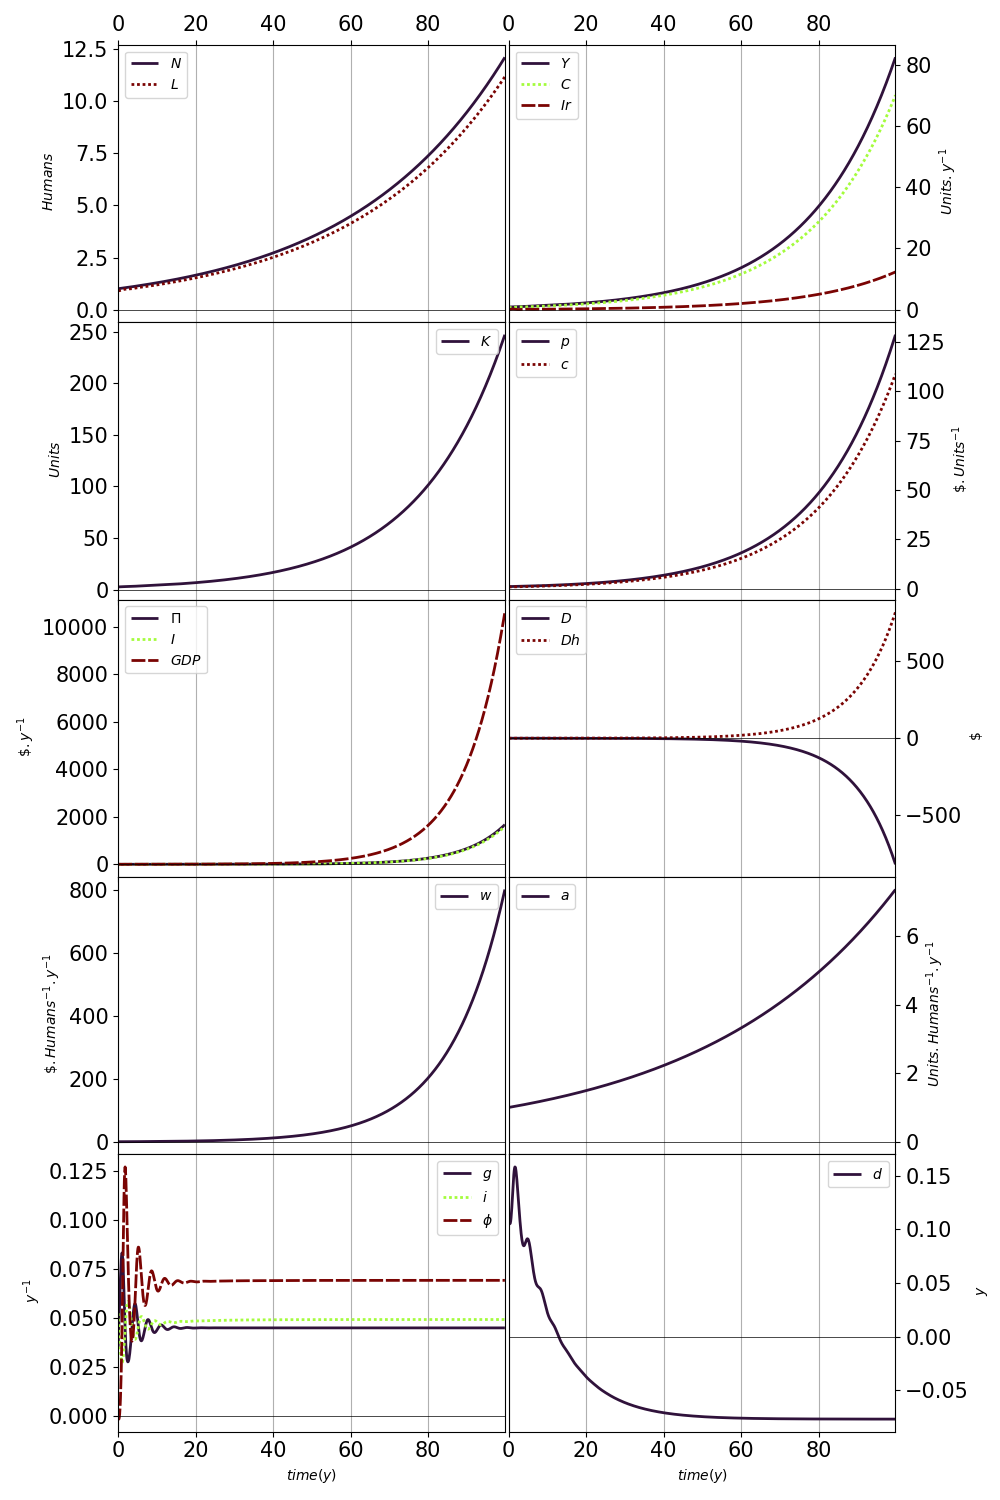

##################################################


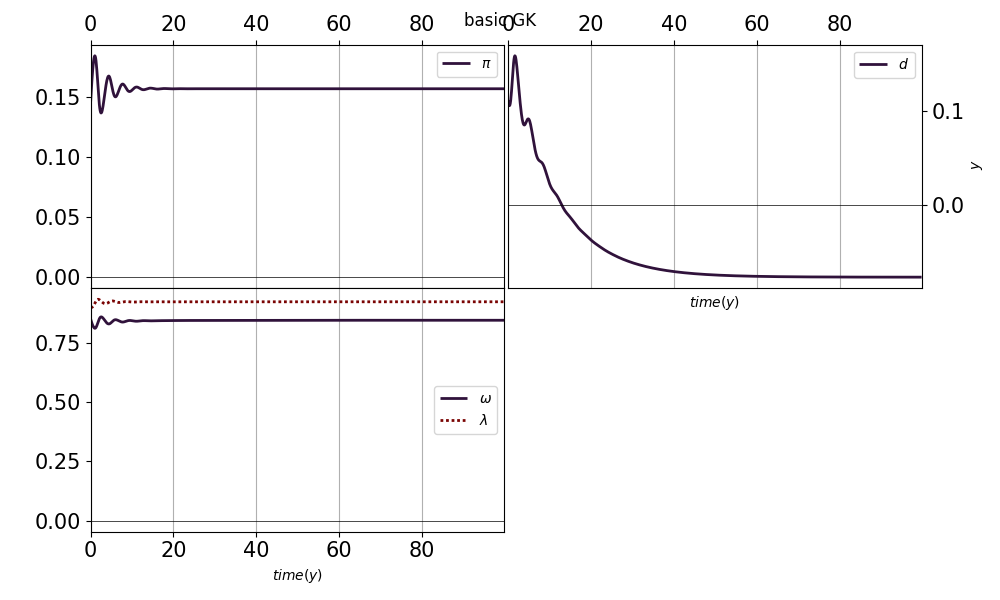

In [27]:
hub.plot(filters_units=['',]) ### Only the dimensionless units
print(50*'#')
hub.plot(filters_units=('',)) ### Everything but the dimensionless units
print(50*'#')
hub.plot(filters_units=['','y'],
         filters_key=('kappa'),
         separate_variables={'':['employment','omega']},
         title='basic GK') ### Everything but the dimensionless units
         

### <a id='toc2_8_4_'></a>[GET ACCESS TO DATA](#toc0_)
All data are in dparam of hub, as a dictionnary of (dictionnary of (dictionnary))
It could be transformed someday in pandas, if someone wants to do it (I have other things to do but that could be nice)

First layer : field name, 
second layer : field properties 

Same system of filters exist for `hub.get_dparam` with list and tuples

In [32]:
help(hub.get_dparam)

Help on method get_dparam in module pygemmes._core:

get_dparam(condition=None, returnas=<class 'dict'>, verb=False, **kwdargs) method of pygemmes._core.Hub instance
    Return a copy of the input parameters dict that you can filter
    lcrit = ['key', 'dimension', 'units', 'type', 'group', 'eqtype','isneeded']



In [30]:
R=hub.get_dparam()
R1 = hub.get_dparam(key=['employment', 'omega'])
R2 = hub.get_dparam(key=('employment', 'omega'))
print(R.keys(),'\n',R1.keys(),'\n',R2.keys())

dict_keys(['a', 'N', 'K', 'w', 'p', 'D', 'Dh', 'pi', 'd', 'omega', 'employment', 'c', 'g', 'Y', 'Pi', 'I', 'C', 'Ir', 'L', 'GDP', 'inflation', 'kappa', 'phillips', 'Delta', 'Tmax', 'Tini', 'dt', 'nx', 'nr', 'Nprod', '__ONE__', 'time', 'nt', 'alpha', 'n', 'delta', 'r', 'nu', 'eta', 'mu', 'k0', 'k1', 'k2', 'phinull', 'phi0', 'phi1']) 
 dict_keys(['omega', 'employment']) 
 dict_keys(['a', 'N', 'K', 'w', 'p', 'D', 'Dh', 'pi', 'd', 'c', 'g', 'Y', 'Pi', 'I', 'C', 'Ir', 'L', 'GDP', 'inflation', 'kappa', 'phillips', 'Delta', 'Tmax', 'Tini', 'dt', 'nx', 'nr', 'Nprod', '__ONE__', 'time', 'nt', 'alpha', 'n', 'delta', 'r', 'nu', 'eta', 'mu', 'k0', 'k1', 'k2', 'phinull', 'phi0', 'phi1'])


In [31]:
R1['employment'].keys()

dict_keys(['func', 'eqtype', 'size', 'value', 'definition', 'units', 'symbol', 'group', 'com', 'multisect', 'kargs', 'args', 'source_exp', 'isneeded'])

In [29]:
groupsoffields = hub.get_dparam_as_reverse_dict(
    crit='units',
    eqtype=['differential', 'statevar'])
for k,v in groupsoffields.items():
    print(k.ljust(25),list(v.keys()))
    
print('\n\n WITH PARAMETERS')
groupsoffields = hub.get_dparam_as_reverse_dict(
    crit='units',
    eqtype=['differential', 'statevar',None])
for k,v in groupsoffields.items():
    print(k.ljust(25),list(v.keys()))

                          ['pi', 'omega', 'employment', 'kappa']
Humans                    ['N', 'L']
Units.y^{-1}              ['Y', 'C', 'Ir']
Units                     ['K']
$.Units^{-1}              ['p', 'c']
undefined                 []
$.y^{-1}                  ['Pi', 'I', 'GDP']
$                         ['D', 'Dh']
$.Humans^{-1}.y^{-1}      ['w']
Units.Humans^{-1}.y^{-1}  ['a']
y^{-1}                    ['g', 'inflation', 'phillips']
y                         ['d', 'time']


 WITH PARAMETERS
                          ['pi', 'omega', 'employment', 'kappa', 'Delta', 'mu', 'k0', 'k1', 'k2', 'phinull']
Humans                    ['N', 'L']
Units.y^{-1}              ['Y', 'C', 'Ir']
Units                     ['K']
$.Units^{-1}              ['p', 'c']
undefined                 ['__ONE__']
$.y^{-1}                  ['Pi', 'I', 'GDP']
$                         ['D', 'Dh']
$.Humans^{-1}.y^{-1}      ['w']
Units.Humans^{-1}.y^{-1}  ['a']
y^{-1}                    ['g', 'inflation', 'phill

#### <a id='toc2_8_4_1_'></a>[Technical point : the data shape](#toc0_)

`Pygemmes` core is made to take into account complex problem, the maximum level for the moment is : 
* multiple system in parrallel with different parameters (not interacting but simulated in parrallel) : it allows statistical treatment on a high number of run, stochasticity, sensibility....
* multiple regions with the same description, interacting differently
* fields to be a vector (N sectors who has a different price)
* fields to be a matrix (coupling between sectors for example)

`Pygemmes` is mostly based on a numpy implementation, dealing well with complex problem of dimensions. By default, all the fields will have values as a 5-dimensional tensor as follow : 
* **a** 'nt' number of timesteps (parameters do not have this one)
* **b** 'nx' number of parrallel system
* **c** 'nr' number of regions
* **d** number of sectors or `__ONE__`
* **e** number of sectors or `__ONE__` 

In consequence, if you want the field `field` value at time iteration **a**, on parrallel system **b**, on region **c**, between sector **d** and **e**, you want 
`R[field]['value'][a,b,c,d,e]`
If you have a monosectoral system with only one region, one parrallel system, and you want all the time values :
`R[field]['value'][:,0,0,0,0]`

In [ ]:
## Example : 
import matplotlib.pyplot as plt 
import numpy as np
R=hub.get_dparam(key=['employment','time'])
print(np.shape(R['employment']['value']))
x=R['time']['value'][:,0,0,0,0]
y=R['employment']['value'][:,0,0,0,0]
plt.plot(x,y)
plt.xlabel('time')
plt.ylabel('employment $\lambda$')
plt.show()

### <a id='toc2_8_5_'></a>[Access to plots already existing](#toc0_)
A lot of plot can be accessed, here is a few samples 

In [33]:
pgm.get_available_plots()

Help on function Var in module pygemmes._plots._plots:

Var(hub, key, mode=False, log=False, idx=0, Region=0, tini=False, tend=False, title='')
    One variable plot, with possibly cycles analysis and sensitivity if asked
    if you put [key,sectorname] it will load the specific sector
    if mode = 'sensitivity' the system will show statistical variance between parrallel run of nx
    if mode = 'cycles' the system will show cycles within the evolution of the variable with their characteristics



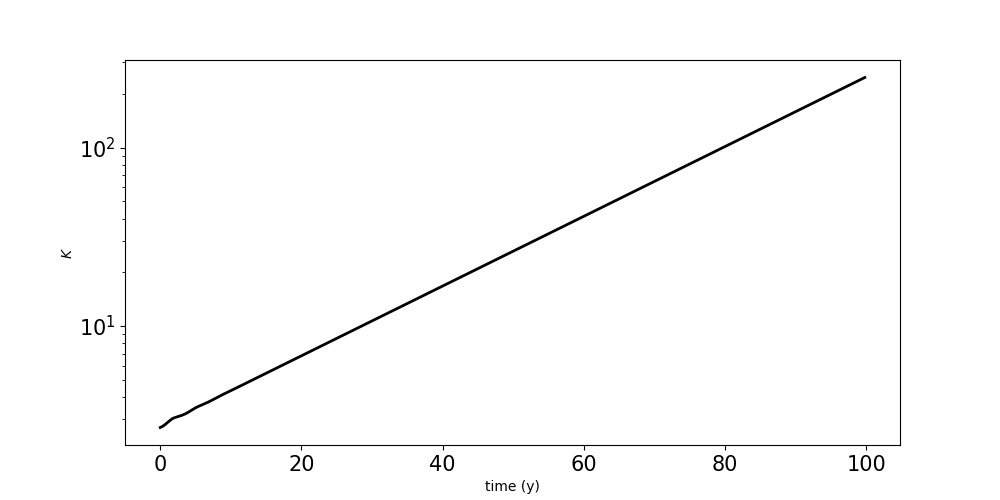

Calculation of cycles on each field as ref...
done


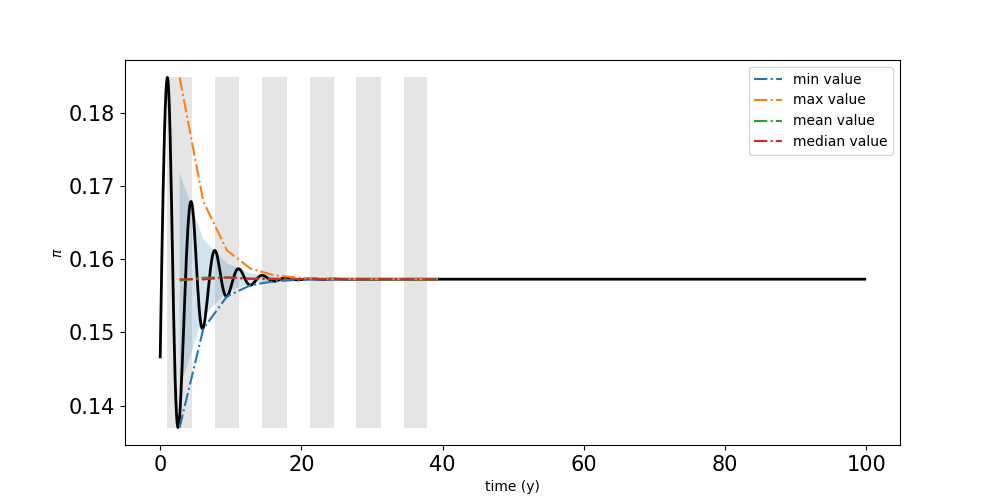

In [34]:
help(pgm.plots.Var)
pgm.plots.Var(hub,'K',log=True)
pgm.plots.Var(hub,'pi',mode='cycles') # We ask him for cycles information. He will activate a toolbox for you to get the data
# sensitivity will be shown later (section set_dparam)

Help on function phasespace in module pygemmes._plots._plots:

phasespace(hub, x, y, color='time', idx=0, Region=0)
    Depreciated, use XY instead

plot phasespace is depreciated, use XY instead


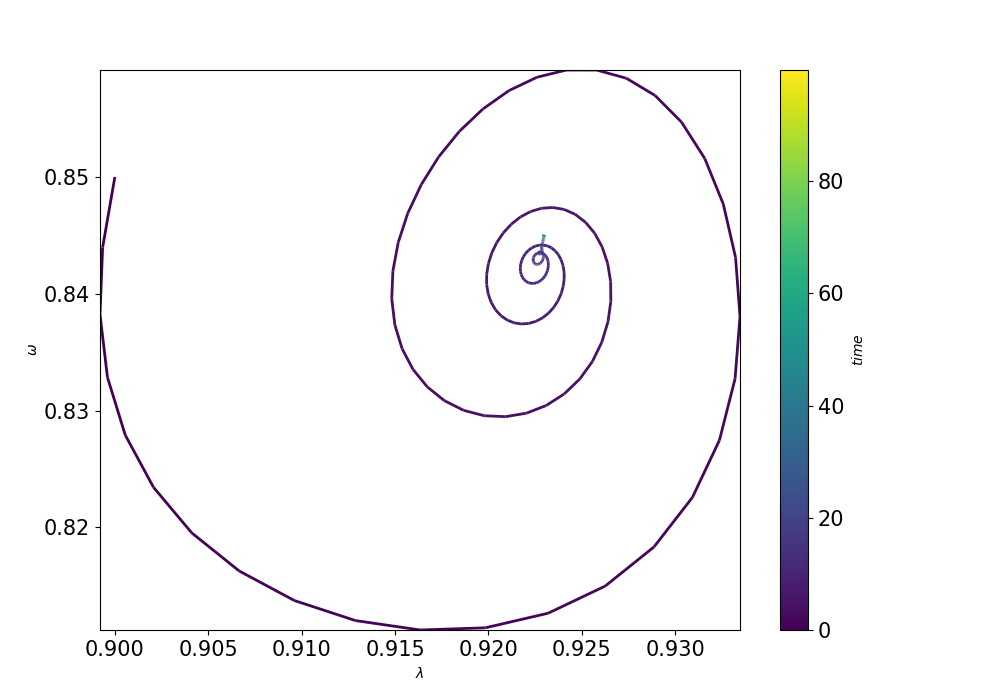

In [35]:
help(pgm.plots.phasespace)
pgm.plots.phasespace(hub,
                     x='employment',
                     y='omega',
                     color='d')

Help on function plot3D in module pygemmes._plots._plots:

plot3D(hub, x, y, z, color, cmap='jet', index=0, Region=0, title='')
    Depreciated, use XYZ instead

Depreciated, use XYZ instead


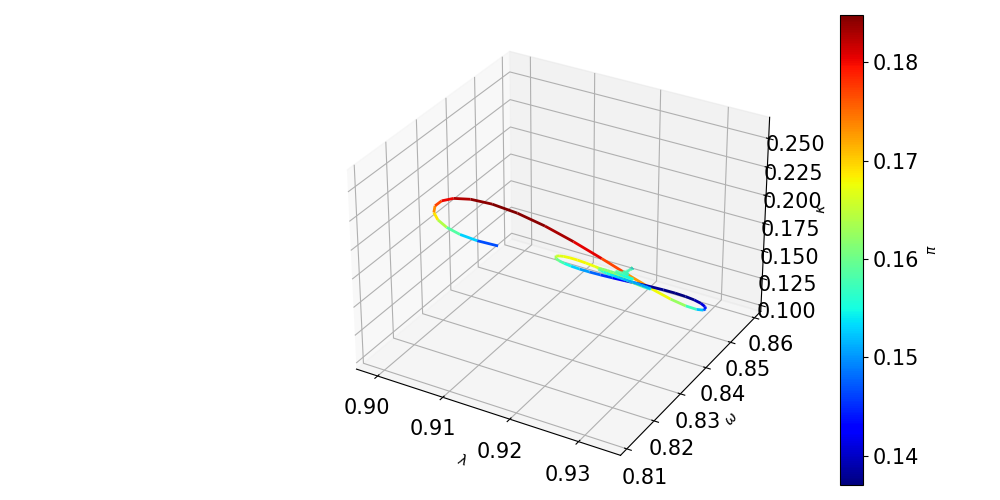

In [36]:
help(pgm.plots.plot3D)
pgm.plots.plot3D(hub, x='employment',
                 y='omega',
                 z='kappa',
                 color='pi',
                 cmap='jet',
                 index=0,
                 title='')

Help on function plotbyunits in module pygemmes._plots._plots:

plotbyunits(hub, filters_key=(), filters_units=(), filters_sector=(), separate_variables={}, lw=1, idx=0, Region=0, tini=False, tend=False, title='')
    generate one subfigure per set of units existing.
    
    There are three layers of filters, each of them has the same logic :
    if the filter is a tuple () it exclude the elements inside,
    if the filter is a list [] it includes the elements inside.
    
    Filters are the following :
    filters_units      : select the units you want
    filters_sector     : select the sector you want  ( '' is all monosetorial variables)
    filters_sector     : you can put sector names if you want them or not. '' corespond to all monosectoral variables
    separate_variables : key is a unit (y , y^{-1}... and value are keys from that units that will be shown on another graph,
    
    Region             : is, if there a multiple regions, the one you want to plot
    idx          

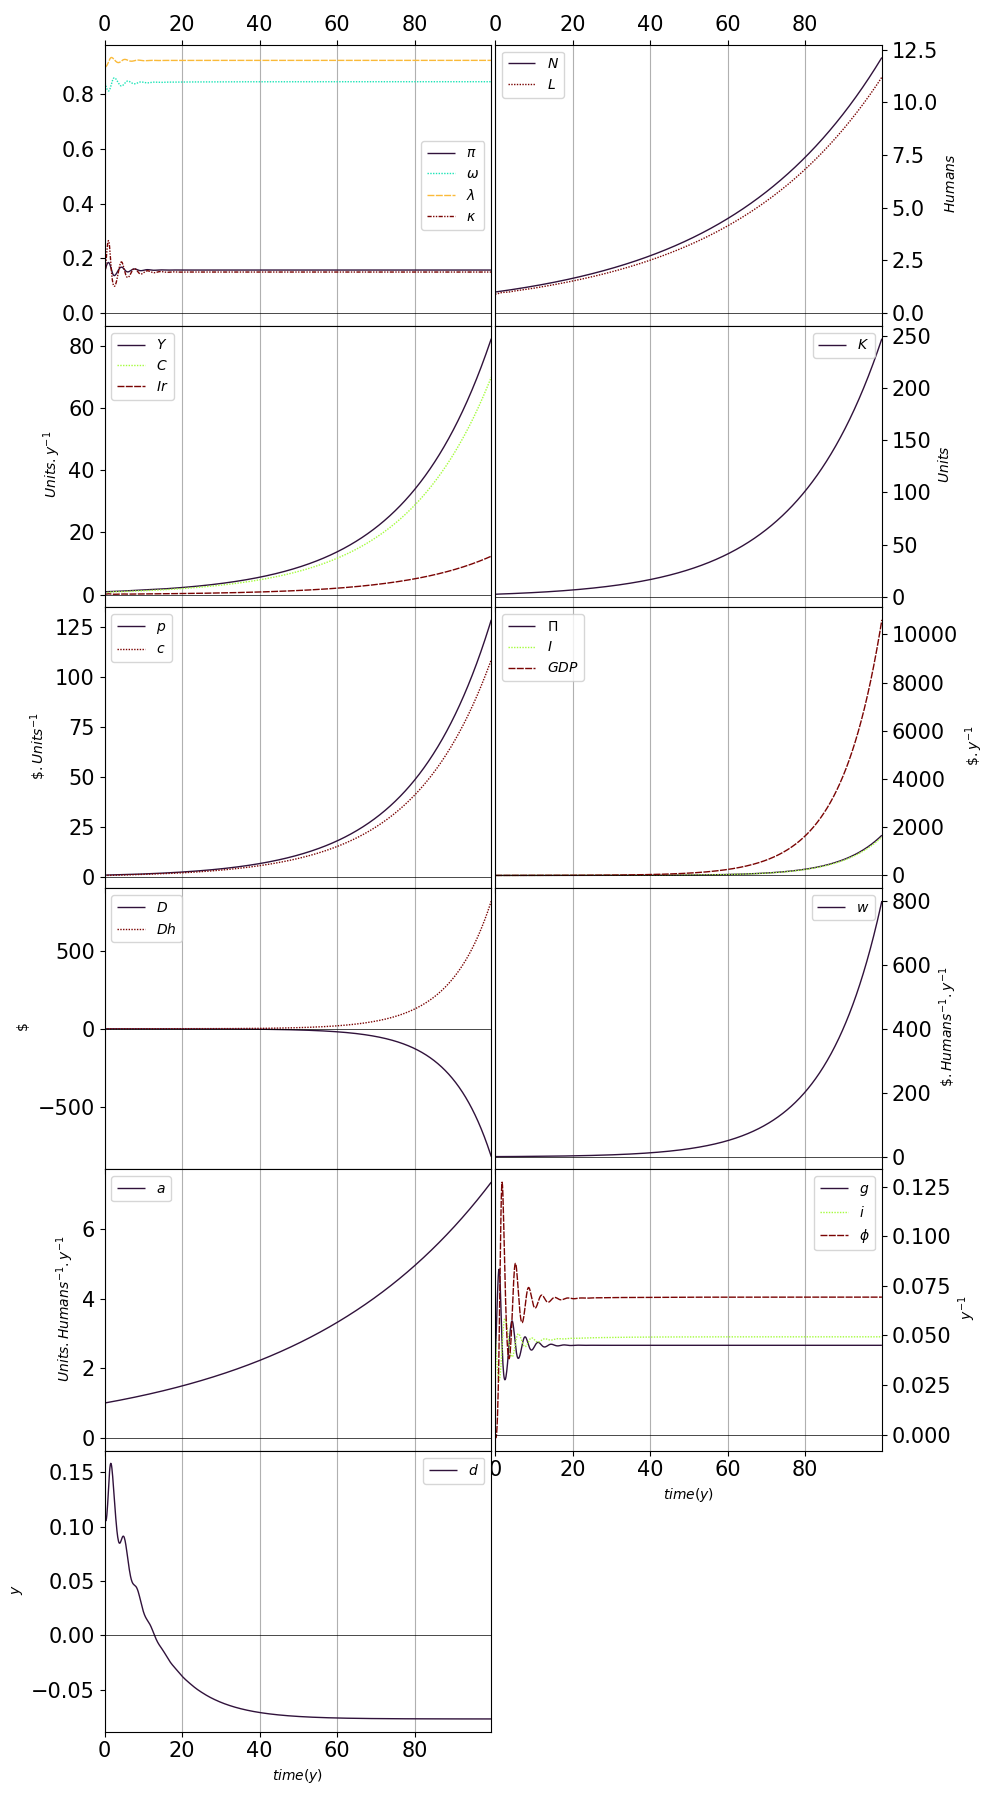

In [37]:
help(pgm.plots.plotbyunits)
pgm.plots.plotbyunits(hub) # same as hub.plot()


Help on function cycles_characteristics in module pygemmes._plots._plots:

cycles_characteristics(hub, xaxis='omega', yaxis='employment', ref='employment', type1='frequency', normalize=False, Region=0, title='')
    Plot frequency and harmonicity for each cycle found in the system
    
    xaxis='omega',yaxis='employment',ref='employment',
    type1 and type2 should be in ['t_mean_cycle','period_T','medval','stdval','minval','maxval','frequency','Coeffs','Harmonicity']



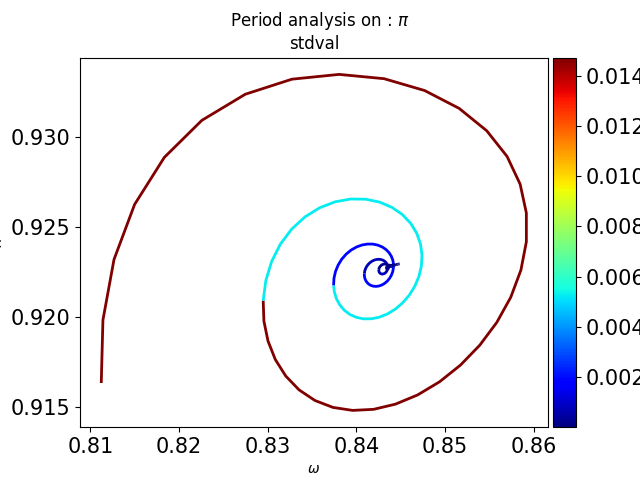

In [38]:
help(pgm.plots.cycles_characteristics)
pgm.plots.cycles_characteristics(hub,'omega','employment',ref='pi',type1='stdval')

Help on function plotnyaxis in module pygemmes._plots._plots:

plotnyaxis(hub, y=[[]], x='time', log=False, idx=0, Region=0, tini=False, tend=False, title='', lw=2, loc='best')
    x must be a variable name (x axis organisation)
    y must be a list of list of variables names (each list is a shared axis)
    
    example :
        pgm.plots.plotnyaxis(hub, x='time',
                     y=[['employment', 'omega'],
                        ['pi'],
                        ],
                     idx=0,
                     title='',
                     lw=2)



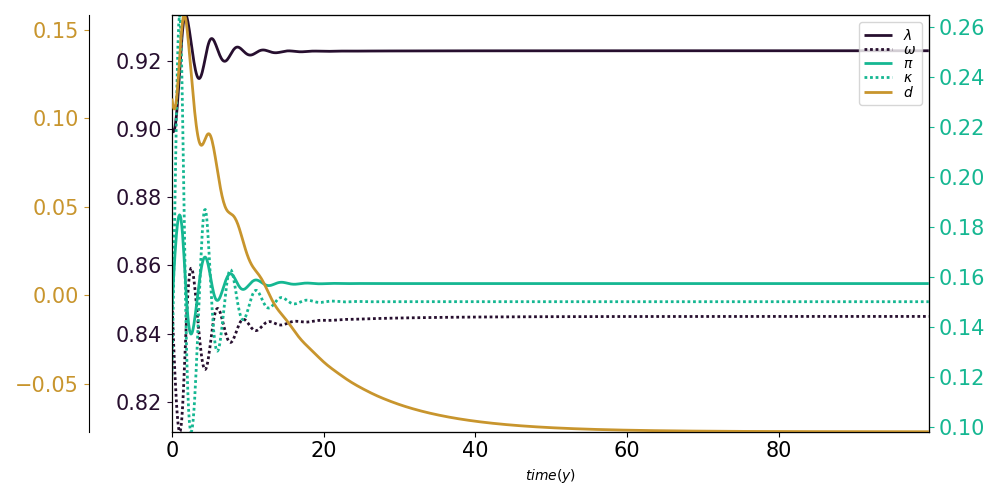

In [39]:
help(pgm.plots.plotnyaxis)
pgm.plots.plotnyaxis(hub, x='time',
             y=[['employment', 'omega'],
                ['pi','kappa'],
                ['d'],
                ],
             idx=0,
             title='',
             lw=2)

Help on function repartition in module pygemmes._plots._plots:

repartition(hub, keys: list, sector='', sign='+', ref='', stock=False, refsign='+', removetranspose=False, title='', idx=0, Region=0, tini=False, tend=False)
    Temporal visualisation of a composition.
    Recommended use on stock-flow consistency and budget repartition.
    
    Variables :
    * hub
    * keys : list of fields considered in the decomposition
    * sector : the sector you want to verify. Monosectoral is ''
    * sign : either '+','-' or a list of ['+','-'], to apply for each key. Must be a list of same length.
    * ref : the reference level to compare to the components. Typically in the case of debt stock-flow, ref is dotD.
    * title : title,
    * idx : number of the system in parrallel
    * region : number or id of the system considered
    * removetranspose : if there is a matrix of transaction (from i to j), add negatively the transpose of the matrix terms
    
    Will create a substack of the d

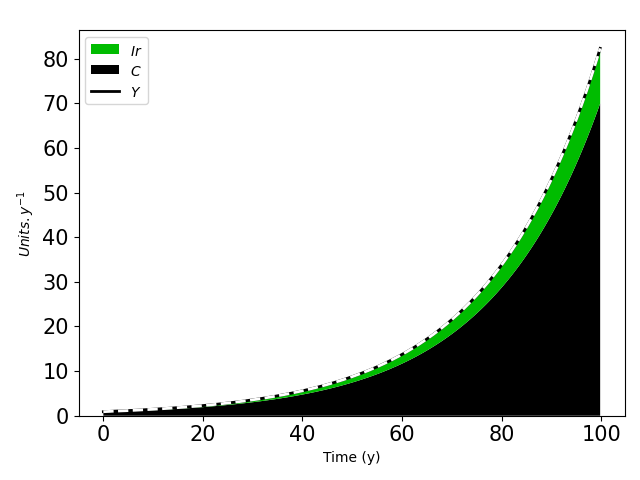

In [40]:
### THis is boring on a "too simple" model, but will be great on some more advanced stuff
help(pgm.plots.repartition)
pgm.plots.repartition(hub,['C','Ir'],ref='Y',sector='')

### <a id='toc2_8_6_'></a>[Presets !](#toc0_)

If the modeller is a nice guy, he created some preset to show some of the model special cases. They contains : 
* specific set of parameters and initial conditions
* plots to put the properties under the spotlight


There are multiple way to load a preset from the start : 
* hub=pgm.Hub('GK',preset=presetname)
* hub=pgm.Hub('GK');hub.set_preset(presetname)

In [44]:
hub=pgm.Hub('GK_divexp')
hub.get_presets()

The following fields are defined in the model but not it the library :
The following fields are identified as parameters :
	- independant : ['alpha', 'n', 'delta', 'r', 'nu', 'eta', 'mu', 'k0', 'k1', 'k2', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['Dh', 'time']
	 - state variable : ['d', 'g', 'GDP']
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['Y', 'L', 'GDP', 'd', 'omega', 'employment', 'c', 'Pi', 'inflation', 'phillips', 'pi', 'kappa', 'I', 'Ir', 'g', 'C']
	- differential: ['a', 'N', 'K', 'w', 'p', 'D', 'Dh', 'time']
List of available presets :
test                           Just a few plots !


The following fields are defined in the model but not it the library :
The following fields are identified as parameters :
	- independant : ['alpha', 'n', 'delta', 'r', 'nu', 'eta', 'mu', 'k0', 'k1', 'k2', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['Dh', 'time']
	 - state variable : ['d', 'g', 'GDP']
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['Y', 'L', 'GDP', 'd', 'omega', 'employment', 'c', 'Pi', 'inflation', 'phillips', 'pi', 'kappa', 'I', 'Ir', 'g', 'C']
	- differential: ['a', 'N', 'K', 'w', 'p', 'D', 'Dh', 'time']

time step 1000 / 1000


C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_plots\_plots.py:232: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


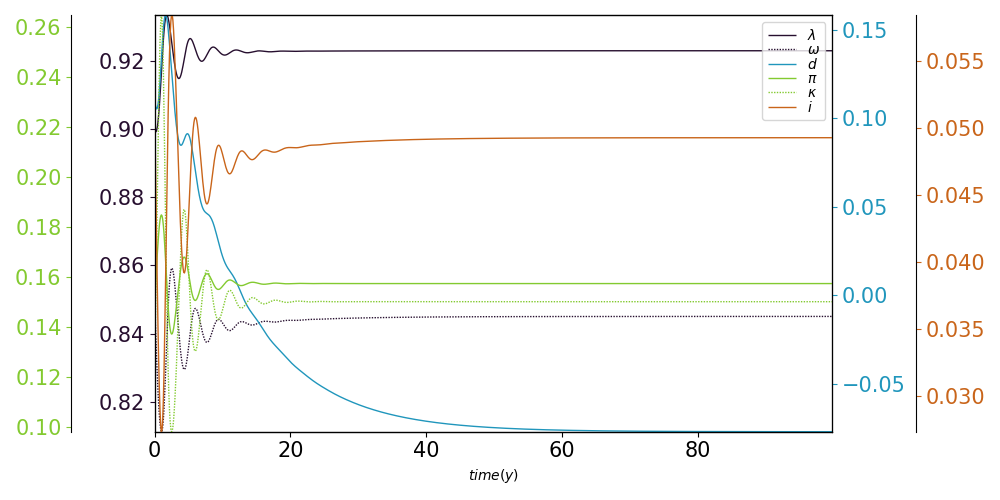

nyaxis
phasespace
XY


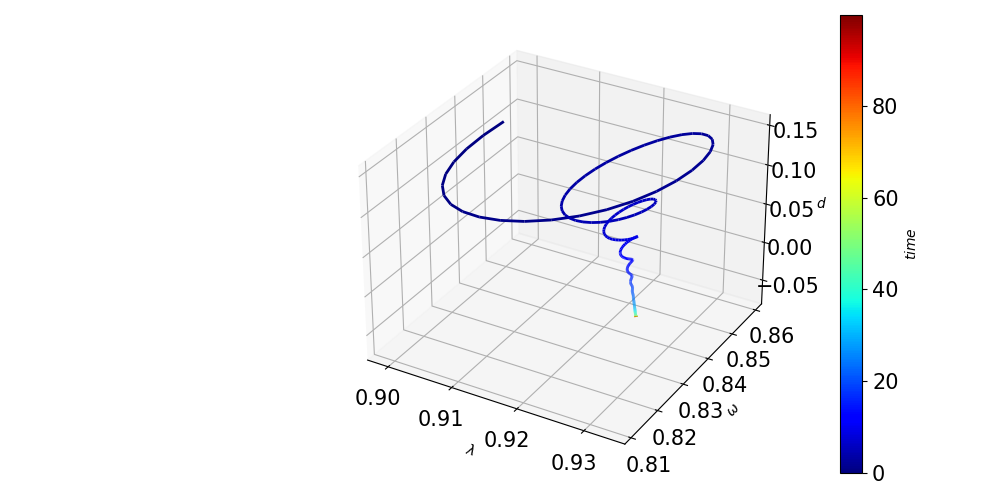

XYZ
3D
sankey
byunits
Onevariable
cycles_characteristics
repartition
convergence


In [48]:
hub=pgm.Hub('GK_divexp',preset='test')
hub.run()
hub.plot_preset()

### <a id='toc2_8_7_'></a>[THE INFAMOUS SET_DPARAM](#toc0_)

Behold ! 
This is the magic function which allow you to change any initial value or parameter, either socio-physical or purely numerical

In [49]:
help(hub.set_dparam)

Help on method set_dparam in module pygemmes._core:

set_dparam(key=None, value=None, verb=True, **kwargs) method of pygemmes._core.Hub instance
    Your best friend to change the fields values or sizes in the system.
    It can change :
        * dimensions ( duration of the simulated tine 'Tmax',
                       duration of one timestep       'dt'
                       number of system in parrallel  'nx',
                       number of regions              'nr',
                       number of sectors in a multisector object typically Nprod
                       )
        * values of parameters and initial conditions, either for all systems/regions/sector or indexwise
    
    if you want to change only one field, you can do "set_dparam(key,values)"
    if you want to change multiple fields at once you can do "set_dparam(**dict)" with dict={key:values},
    the way to put multiple values or specific sector will be explained in 2)
    
    1) ### CHANGE DIMENSIONS ########

In [50]:
# changing one value 
hub=pgm.Hub('GK',verb=False)
hub.set_dparam('alpha',0)
hub.get_summary()


Changing Fields: ['alpha']
Identified alpha as a value change on all axes
############################################################
####################      SUMMARY       ####################
############################################################
Model       : GK
Goodwin-Keen model: debt dynamics with residual consumption
File        : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\Core\_model_GK.py
####################       Fields       ####################
statevar        016 ['Y', 'L', 'GDP', 'd', 'omega', 'employment', 'c', 'Pi', 'inflation', 'phillips', 'pi', 'kappa', 'I', 'Ir', 'g', 'C']
differential    008 ['a', 'N', 'K', 'w', 'p', 'D', 'Dh', 'time']
parameters      019 ['alpha', 'n', 'delta', 'r', 'nu', 'eta', 'mu', 'k0', 'k1', 'philinConst', 'philinSlope', 'Delta', 'Nprod']
####################      Presets       ####################
          default2      : Basic
####################       Flags        ####################
run            : False
cycles      

[0.    0.025 0.05  0.075 0.1  ]

Changing Dimensions: ['nx']
Changing Fields: ['alpha']
Now nx has 5 sectors with names [0, 1, 2, 3, 4]

time step 1000 / 1000
the system is calculating statsensitivity...
done


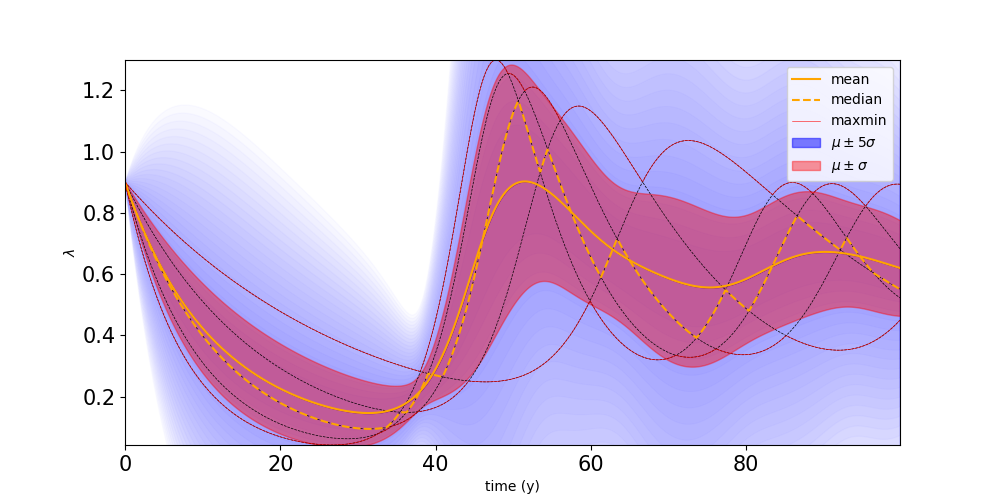

In [53]:
# PUTTING 10 VALUES 
import numpy as np
print(np.linspace(0,0.1,5))
hub=pgm.Hub('GK',verb=False)
hub.set_dparam(**{
    'nx':5,
    'alpha':np.linspace(0,0.1,5),})
hub.run()
pgm.plots.Var(hub,'employment',mode='sensitivity')

In [ ]:
# changing one value 
hub=pgm.Hub('GK',verb=False)
hub.set_dparam(**{'alpha':0,
                  'delta':0.03})
hub.get_summary()


Changing Dimensions: ['nx']
Changing Fields: ['alpha', 'k2', 'mu']
Now nx has 100 sectors with names [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

time step 1000 / 1000


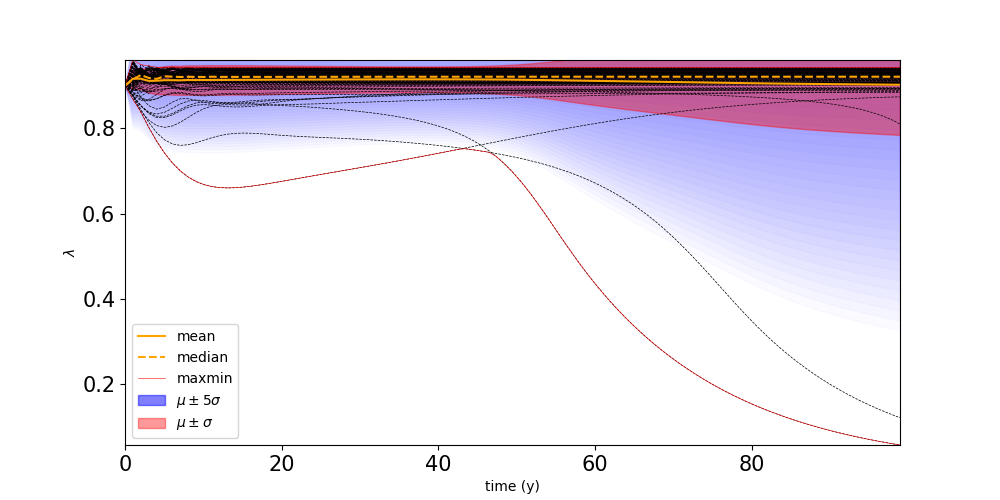

Help on function generate_dic_distribution in module pygemmes._toolbox:

generate_dic_distribution(InputDic, dictpreset={}, N=10)
    Wrapup around GenerateIndividualSensitivity function, to generate multiple distributions entangled.
    
    InputDic should look like :
        {
        'alpha': {'mu': .02,
                  'sigma': .2,
                  'type': 'normal'},
        'k2': {'mu': 20,
               'sigma': .2,
               'type': 'log'},
        'mu': {'mu': 1.3,
               'sigma': .2,
               'type': 'uniform'},
        }
    
    'type' can be :
        1. 'log','lognormal','log-normal' for lognormal distribution
        2. 'normal','gaussian' for gaussian distribution
        3. 'uniform' for uniform distribution in interval [mu,sigma]
    
    Be careful, grid will generate N**len(InputDic.key()) run if activated !
    
    GenerateIndividualSensitivity :
        Generate a preset taking random values in one distribution.
    
    INPUT :
        * m

In [58]:
# Putting values taken randomly in a distribution 

SensitivityDic = {
    'alpha': {'mu': .02,
              'sigma': .12,
              'type': 'log'},
    'k2': {'mu': 20,
           'sigma': .12,
           'type': 'log'},
    'mu': {'mu': 1.3,
           'sigma': .12,
           'type': 'log'},
}
presetSimple = pgm.generate_dic_distribution(
    {'alpha': {'mu': 0.02,
               'sigma': .2,
               'type': 'log'}, }, N=100)
presetCoupled = pgm.generate_dic_distribution(SensitivityDic,
                                              N=100)
presetCoupled['nx']=100

hub=pgm.Hub('GK_divexp',verb=False)
hub.set_dparam(**presetCoupled)
hub.run(N=100)
hub.calculate_StatSensitivity()
pgm.plots.Var(hub,'employment',mode='sensitivity')

help(pgm.generate_dic_distribution)

## <a id='toc2_9_'></a>[Convergence rate and valleys of stability](#toc0_)


Changing Dimensions: ['nx']
Changing Fields: ['employment', 'omega', 'd']
Now nx has 1000 sectors with names [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,

C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\ReducedSystem\_model_reduced_GK.py:38: RuntimeWarning: overflow encountered in exp
  'kappa': {'func': lambda k0, k1, k2, pi: k0 + k1 * np.exp(k2 * pi),
C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\ReducedSystem\_model_reduced_GK.py:30: RuntimeWarning: invalid value encountered in multiply
  'd': {         'func': lambda d, kappa, pi, g, inflation,Delta:  kappa - pi + pi*Delta  - d*(g+inflation),}
C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\ReducedSystem\_model_reduced_GK.py:33: RuntimeWarning: overflow encountered in square
  'phillips': {'func': lambda phi0, phi1, employment: (-phi0 + phi1 / (1 - employment)**2),


time step 1000 / 1000
[9.81715583e+12 9.76607635e+12 9.71526264e+12 9.66471332e+12
 9.61442701e+12 9.56440234e+12 9.51463796e+12 9.46513250e+12
 9.41588463e+12 9.36689299e+12]
[3.22335375e-06 3.18458297e-06 3.14627853e-06 3.10843481e-06
 3.07104629e-06 3.03410747e-06 2.99761296e-06 2.96155741e-06
 2.92593554e-06 2.89074213e-06]
[1.12584030e+23 1.18797021e+23 1.25352879e+23 1.32270524e+23
 1.39569923e+23 1.47272141e+23 1.55399410e+23 1.63975186e+23
 1.73024220e+23 1.82572629e+23]


c:\ProgramData\Anaconda3\envs\pyIDEE\Lib\site-packages\numpy\linalg\linalg.py:2541: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


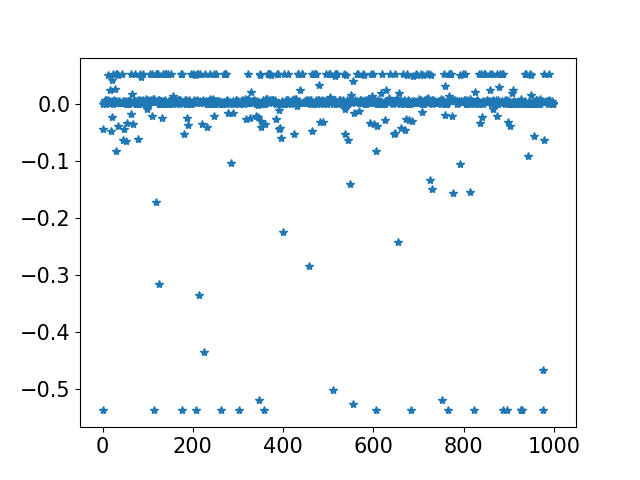

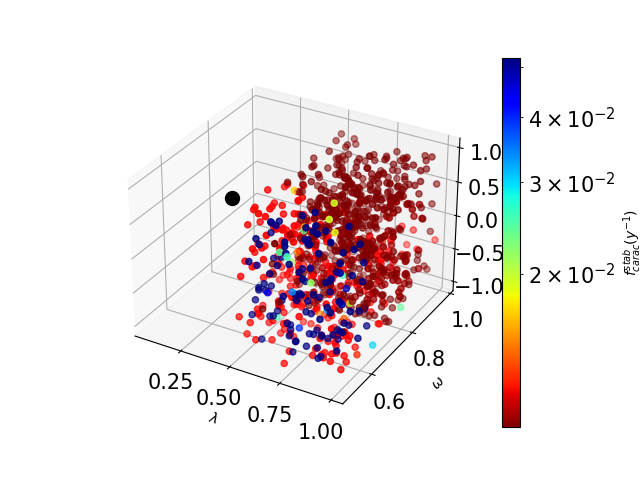

In [80]:
hub=pgm.Hub('reduced_GK',verb=False)

BasinDomain = {
    'employment': {'mu': 0.5,
               'sigma': 0.99,
               'type': 'uniform'},
    'omega': {'mu': 0.5,
              'sigma': .98,
              'type': 'uniform'},
    'd': {'mu': -1,
          'sigma': 1,
          'type': 'uniform'},
}
initcond = pgm.generate_dic_distribution(BasinDomain,
                                         N=1000)
hub.set_dparam(**initcond,verb=True)
hub.run()
hub.reinterpolate_dparam(N=1000)

R=hub.dparam
print(R['employment']['value'][-10:,0,0,0,0]) #0.07703
print(R['omega']['value'][-10:,0,0,0,0]) #0.8450464
print(R['d']['value'][-10:,0,0,0,0]) #-0.07703629

finalpoint = {
    'employment': 0.07703,
    'omega': 0.8450464,
    'd': -0.07703629,
}
pgm.plots.convergence(hub,finalpoint)


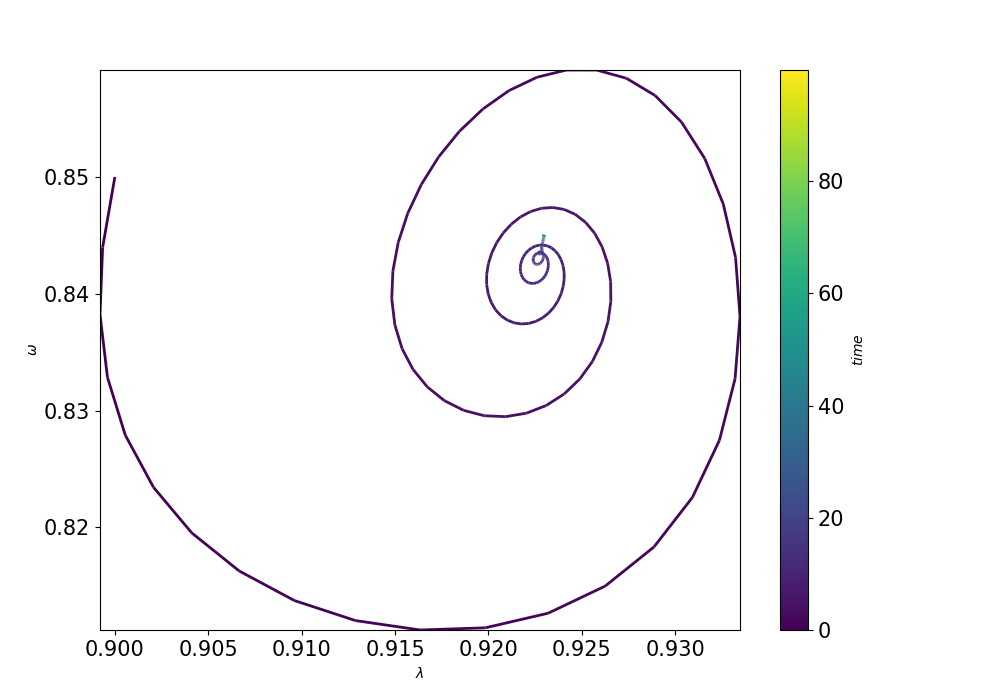

## 

The following fields are defined in the model but not it the library :
The following fields are identified as parameters :
	- independant : ['alpha', 'n', 'delta', 'r', 'nu', 'eta', 'mu', 'k0', 'k1', 'k2', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['Dh', 'time']
	 - state variable : ['d', 'g', 'GDP']
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['Y', 'L', 'GDP', 'd', 'omega', 'employment', 'c', 'Pi', 'inflation', 'phillips', 'pi', 'kappa', 'I', 'Ir', 'g', 'C']
	- differential: ['a', 'N', 'K', 'w', 'p', 'D', 'Dh', 'time']

Changing Dimensions: ['Tmax']

time step 500 / 500
The following fields are defined in the model but not it the library :
The following fields are identified as parameters :
	- independant : ['alpha', 'n', 'delta', 'r', 'nu', 'eta', 'mu', 'k0', 'k1', 'k2', 'phinull']
	- function of other parameters : ['phi0', 'phi1']

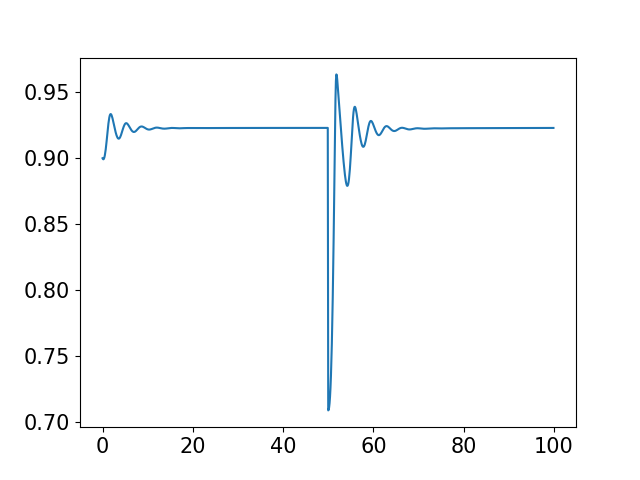

In [108]:
### FIRST RUN
hub=pgm.Hub('GK_divexp',preset='test')
hub.set_dparam(**{'Tmax':50})
hub.run()
#hub.plot()
R1 = hub.dparam
### WE EXTRACT THE NEW STATE OF THE SYSTEM 
newpreset=hub.Extract_preset(t=50)
#for k,v in newpreset.items():print(k,v)

### WE PUT IT IN A NEW HUB ( TO KEEP PREVIOUS VALUES )
hubnext=pgm.Hub('GK_divexp')
hubnext.set_dparam(**newpreset)
hubnext.set_dparam(**{'K':20,})
hubnext.run()
#hubnext.plot()
R2 = hubnext.dparam

T =np.concatenate((R1['time'      ]['value'][:,0,0,0,0],R2['time'      ]['value'][:,0,0,0,0]+50))
E =np.concatenate((R1['employment']['value'][:,0,0,0,0],R2['employment']['value'][:,0,0,0,0]))

import matplotlib.pyplot as plt
plt.figure()
plt.plot(T,E)
plt.show()


## <a id='toc2_10_'></a>[Multisectorality](#toc0_)

The new cool kid in town

In [ ]:
pgm.get_available_models()
hub=pgm.Hub('CHIMES',preset='MonoSectoral')
hub.get_summary()
hub.run()

In [ ]:
def allplots_multisect(hub):
    R=hub.get_dparam()
    sectors = R['Nprod']['list']
    for sector in sectors :
        pgm.plots.plotnyaxis(hub, y=[[['inflation', sector],
                                      ['inflationMarkup', sector],
                                      ['inflationdotV', sector], ],
                                     [['c',sector],
                                      ['p',sector]],
                                     [['pi',sector],
                                      ['kappa',sector]],
                                     [['employmentlocal',sector],
                                      ['u',sector],
                                      ]],)
        pgm.plots.repartition(hub,
                              ['pi','omega','xi','gamma','rd','reloverinvest','reldotv'],
                              sector=sector,
                              title='Expected relative budget $\pi$ ')
        pgm.plots.repartition(hub,['TakenbyY','TakenbyI','C','dotV'],
                              ref='Y',
                              sector=sector,
                              title=f'Physical Fluxes for sector {sector}')
        pgm.plots.repartition(hub,['Wage','TransactInter','TransactI','Consumption','Interests'],
                              ref='dotD',
                              sector=sector,
                              title=f'Monetary Fluxes for sector {sector}')
    

In [ ]:
hub=pgm.Hub('CHIMES',preset='Bisectoral')
hub.get_summary()
hub.run()


In [ ]:
hub.get_summary(removesector=('Consumption'))

In [ ]:
%matplotlib inline
allplots_multisect(hub)

## <a id='toc2_11_'></a>[Inter-region interactions](#toc0_)

We can solve 
    $dC/dt = -D \nabla \nabla C$
With the spatial dimension being taken by distances



In [57]:
pgm.get_available_models('Diffusion',details=True)
hub=pgm.Hub('PDE-Diffusion',preset='Basic')
hub.run()
R=hub.get_dparam()
C=R['C']['value'][:,0,:,0,0]
for i in range(9):
    plt.plot(C[100*i,:],label=f't={i}')
plt.legend()
plt.show()

hub.get_equations_description()

KeyError: 'Idelta'

### <a id='toc2_11_1_'></a>[RUN PERTURBATION](#toc0_)

We run the system, then we take the final state of the system as the initial condition of a new one. We shift the value, and we see how it respond.

In [ ]:
### FIRST RUN
hub=pgm.Hub('GK',preset='default')
hub.set_dparam('dt',0.1)
hub.run()
hub.plot()

### WE EXTRACT THE NEW STATE OF THE SYSTEM 
newpreset=hub.Extract_preset()
for k,v in newpreset.items():print(k,v)
### WE PUT IT IN A NEW HUB ( TO KEEP PREVIOUS VALUES )
#hubnext=pgm.Hub('GK')
#hubnext.set_dparam(**newpreset)
#hubnext.set_dparam('K',200)
#hubnext.run()
#hubnext.plot()



In [ ]:
help(hub.Extract_preset)
hub.Extract_preset(t=50)

# <a id='toc3_'></a>[Your turn !](#toc0_)

## <a id='toc3_1_'></a>[Running the system on your own](#toc0_)
1. Reset your terminal
2. Load pygemmes 
3. Load a model (GoodwinFull) 
4. Look at the summary 
5. Change one parameter (for example, the interest rate)
6. Do a run 
7. Do a plot of only variables you want (for example employment, omega, d,N,L)
8. Do a 3D plot 
9. Calculate the cycles and show them one omega
10. Change the interest rate with 15 different values, and check the sensitivity of the system to it on employment
11. Load a preset, and plot it

Bonus : define a set of things you would be interested to do with pygemmes, either do it or share it here : https://github.com/DaluS/GEMMES/discussions/192

Then you can switch on creating your own models, with the tutorial `Model creation` is the same folder as this one